# Data Analysis of Beer_Review Dataset


In [677]:
import pandas as pd
file_path = 'beer_reviews.csv'  
beer_reviews = pd.read_csv(file_path)  
df = beer_reviews.copy()  # i create the copy in case we need the original file later

df.head()  #load the first 5 rows of the dataset to see if data loaded succesfully and also to have a preview of the dataset


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## Exploratory Data Analysis 


In [679]:
df.info()  # to have an overall veiw of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [120]:
categorical_columns = ['brewery_name', 'review_profilename', 'beer_style', 'beer_name']
for col in categorical_columns:
    df[col] = df[col].astype('category')  #change object type to category type for reducing the memory usage in pandas

In [122]:
df.dtypes

brewery_id               int64
brewery_name          category
review_time              int64
review_overall         float64
review_aroma           float64
review_appearance      float64
review_profilename    category
beer_style            category
review_palate          float64
review_taste           float64
beer_name             category
beer_abv               float64
beer_beerid              int64
dtype: object

In [72]:
df.describe()  #to have more info about the dataset

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.518478e+06,1518478,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06
mean,3.074306e+03,2008-10-30 01:51:51.851499008,3.823938e+00,3.746218e+00,3.850383e+00,3.753735e+00,3.804082e+00,7.042488e+00,2.140575e+04
min,1.000000e+00,1996-08-22 00:00:01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,2007-04-03 01:02:13,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.654000e+03
50%,4.170000e+02,2009-04-21 23:16:33,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.283000e+04
75%,2.298000e+03,2010-11-06 23:23:48.750000128,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.923600e+04
max,2.800300e+04,2012-01-11 12:35:48,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731600e+04
std,5.544339e+03,NaN,7.172663e-01,6.953440e-01,6.143106e-01,6.793350e-01,7.286079e-01,2.322568e+00,2.178033e+04


In [124]:
df.isnull().sum() # i want to see how many null values every column have


brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [150]:
#eventhough there are many ways to deal with null values but since the amount of missing values are small amout compared to full data, we can just drop them
df = df.dropna()
df.isnull().sum()



brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [136]:
df.duplicated().sum()  # i want to see if there are any duplicate values

0

In [734]:
#there is no duplicate values to deal with

## <span style="color:blue"> Question 1. Which brewery produces the strongest beers by abv?


In [154]:
# First I want to see the strongest 15 beers
strongest_beers = df[['beer_name', 'brewery_name', 'beer_abv']].sort_values(by='beer_abv', ascending=False)
strongest_beers_unique = strongest_beers.drop_duplicates(subset=['beer_name', 'brewery_name']).head(15)  #In order to have every beer_name only once
strongest_beers_unique

,beer_name,brewery_name,beer_abv
12919,Schorschbräu Schorschbock 57%,Schorschbräu,57.70
12940,Schorschbräu Schorschbock 43%,Schorschbräu,43.00
746352,Sink The Bismarck!,BrewDog,41.00
12941,Schorschbräu Schorschbock 40%,Schorschbräu,39.44
996155,Black Damnation VI - Messy,De Struise Brouwers,39.00
748342,Tactical Nuclear Penguin,BrewDog,32.00
12918,Schorschbräu Schorschbock 31%,Schorschbräu,30.86
1042332,Dave,Hair of the Dog Brewing Company / Brewery and ...,29.00
746422,Ghost Deer,BrewDog,28.00
294059,Samuel Adams Utopias,Boston Beer Company (Samuel Adams),27.00


### Above I could see which beer_names have the highest abv for having a general insight

### But this table is not enough alone to tell something, we need more statictical exploration.

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 154 (\x9a) missing from current font.



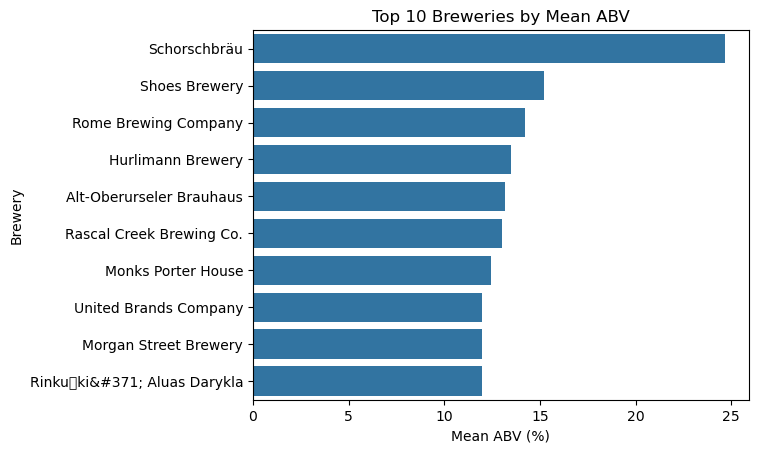

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 154 (\x9a) missing from current font.



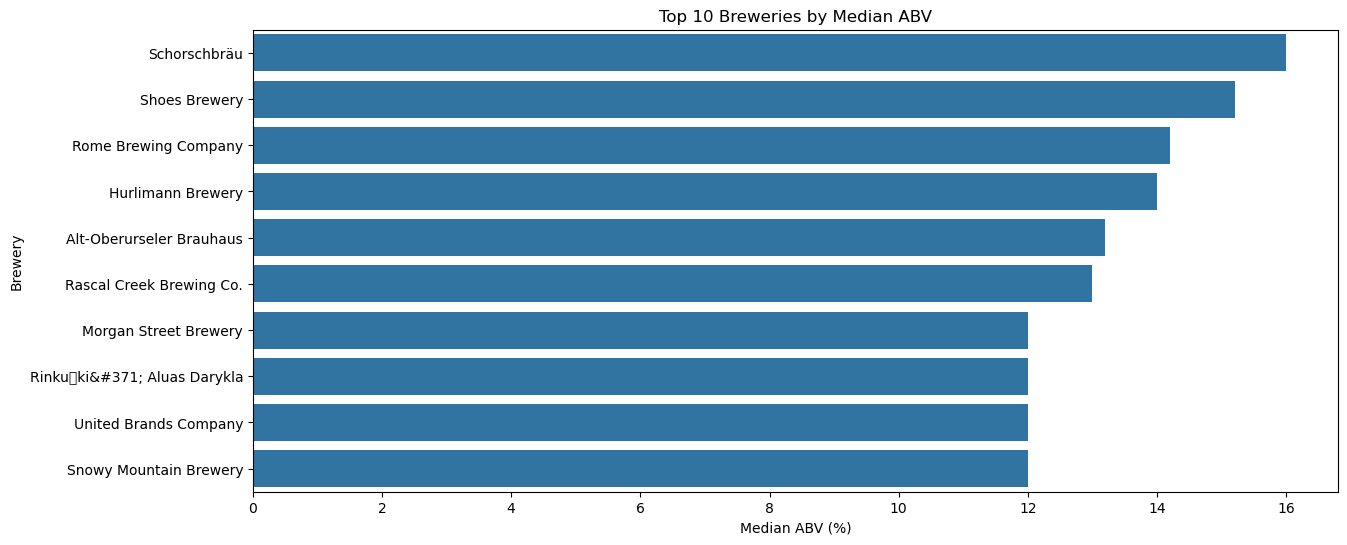

In [687]:
# Group by brewery and calculate mean and median ABV
brewery_abv = df_unique_beers.groupby('brewery_name').agg(
    mean_abv=('beer_abv', 'mean'),
    median_abv=('beer_abv', 'median')
).reset_index()

# Sort by mean ABV in descending order
sorted_by_mean = brewery_abv.sort_values(by='mean_abv', ascending=False)

# Sort by median ABV in descending order
sorted_by_median = brewery_abv.sort_values(by='median_abv', ascending=False)

# Top 10 breweries by mean ABV
sns.barplot(x='mean_abv', y='brewery_name', data=sorted_by_mean.head(10))
plt.title('Top 10 Breweries by Mean ABV')
plt.xlabel('Mean ABV (%)')
plt.ylabel('Brewery') 
plt.show()

# Top 10 breweries by median ABV
plt.figure(figsize=(14, 6))
sns.barplot(x='median_abv', y='brewery_name', data=sorted_by_median.head(10))
plt.title('Top 10 Breweries by Median ABV')
plt.xlabel('Median ABV (%)')
plt.ylabel('Brewery')
plt.show()

### Schorschbrau has the highest percentage beers in the first table,Schorschbrau also has highest mean and median values. We can easily tell that Schorschbrau IS THE STRONGEST BREWERY BY ABV.



In [216]:
#I want to do further investigateion to the Schorschbrau beers
schorschbrau_beers = df[df['brewery_name'] == 'Schorschbräu']

unique_schorschbrau_beers = schorschbrau_beers[['beer_name', 'beer_abv']].drop_duplicates()
unique_schorschbrau_beers


,beer_name,beer_abv
12909,Schorschbräu Dunkles,4.90
12910,Schorschbock Ice 13,13.00
12911,Schorschbock,16.00
12914,Schorschbräu Donner Bock,13.00
12917,Schorsch Weizen 16%,16.00
12918,Schorschbräu Schorschbock 31%,30.86
12919,Schorschbräu Schorschbock 57%,57.70
12928,Schorschbräu Donner Weizen,13.00
12934,Schorschbräu Schorschbock 40%,39.44
12939,Schorschbräu Schorschbock 43%,43.00


In [214]:
unique_schorschbrau_beers.describe()


,beer_abv
count,10.00000
mean,24.69000
std,17.10488
min,4.90000
25%,13.00000
50%,16.00000
75%,37.29500
max,57.70000


### There are total 10 Schorschbrau beers and 9 of them has over %13 of ABV and 75 quantile is 37.29500, which also tells us a lot.

## <span style="color:blue"> QUESTION 2.  If you had to pick 3 beers to recommend to someone, how would you approach the problem?

In [692]:
df['beer_name'].nunique()  # I want to see how many different beer names there are in the dataset.

56857

In [234]:
df['review_overall'].describe()

count    1.518478e+06
mean     3.823938e+00
std      7.172663e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

In [326]:
review_counts = df['beer_name'].value_counts()
review_counts

beer_name
90 Minute IPA                          3289
Old Rasputin Russian Imperial Stout    3110
Sierra Nevada Celebration Ale          2999
India Pale Ale                         2960
Two Hearted Ale                        2727
                                       ... 
Caves Right Pilsner                       1
Public House                              1
Fish In A Barrel                          1
Kenny The IPA                             1
Moska Negra                               1
Name: count, Length: 44075, dtype: int64

In [328]:
review_counts.describe()

count    44075.000000
mean        34.452138
std        137.241151
min          1.000000
25%          1.000000
50%          3.000000
75%         12.000000
max       3289.000000
Name: count, dtype: float64

In [282]:
#since the mean is 34, i will eliminate the beers which has less than avarage number of reviews

In [332]:
(review_counts[review_counts >= review_counts.mean()]).describe()

count    6220.000000
mean      212.058521
std       310.607503
min        35.000000
25%        55.000000
50%        98.000000
75%       228.000000
max      3289.000000
Name: count, dtype: float64

In [338]:
filtered_beers = df.groupby('beer_name').filter(lambda x: len(x) >= 250)  # I thought for having a more trustable results, I should consider beers which has at least 250 review
beer_ratings = filtered_beers.groupby('beer_name').agg(
    avg_rating=('review_overall', 'mean'),
    count=('review_overall', 'size')
)

# I sort it by average ratinG
top_3_beers = beer_ratings.sort_values(by='avg_rating', ascending=False).head(3)

# Display the top 3 recommended beers
print(top_3_beers)

                          avg_rating  count
beer_name                                  
Citra DIPA                  4.630952    252
Heady Topper                4.625800    469
Trappist Westvleteren 12    4.617925   1272


### Based on number of reviews and average ratings, I would recommend these beers.
### Of course beer recomendation is complex topic, we could also use some ML to create a beer recomendadtion model.

## <span style="color:blue"> Question 3 - What are the factors that impacts the quality of beer the most ?

In [703]:
#There are 5 subfactors taste, palette, aroma, appearance, and Abv. I will check the corralation between them
# List of numeric factors to include
factors = ["review_appearance","review_aroma","review_palate","review_taste", "review_overall", "beer_abv"]

# Create a correlation matrix 
corr_metrics = df[factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_appearance,review_aroma,review_palate,review_taste,review_overall,beer_abv
review_appearance,1.000000,0.561029,0.566634,0.546980,0.501732,0.263941
review_aroma,0.561029,1.000000,0.616947,0.716776,0.616013,0.332570
review_palate,0.566634,0.616947,1.000000,0.734135,0.701914,0.286711
review_taste,0.546980,0.716776,0.734135,1.000000,0.789816,0.290827
review_overall,0.501732,0.616013,0.701914,0.789816,1.000000,0.138512
beer_abv,0.263941,0.332570,0.286711,0.290827,0.138512,1.000000


### As we could see, Taste(0.79), Palate(0.70), Aroma(0.62) and then Apperance(0.50) has the factors that affects the most, Abv(0.14) doesnt have high correlation that I will be ignoring it for the future questions. 

## <span style="color:blue"> Second Approach to Q3

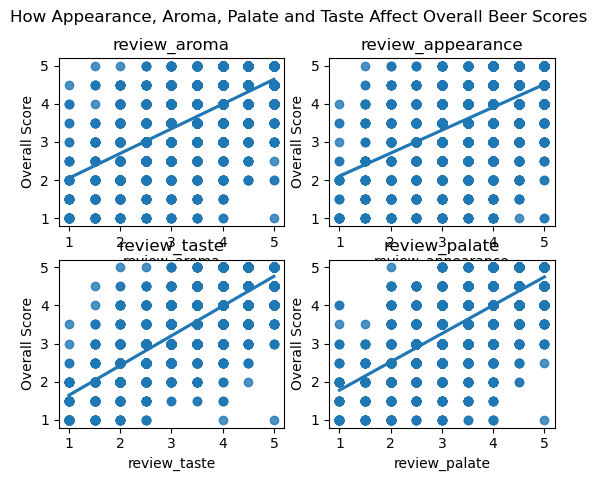

In [720]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sampled_data = df.sample(frac=0.01)  # Since its a realy big dataset, i will take o sample of %1



features = ['review_aroma', 'review_appearance', 'review_taste', 'review_palate']


for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=feature, y='review_overall', data=sampled_data
                )
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Overall Score')

plt.suptitle('How Appearance, Aroma, Palate and Taste Affect Overall Beer Scores')
plt.show()


### We can easily see the correlation between variables. The higher the angle of the curve(Since its a positive correlation), the greater the correlation. Taste has the highest angle, then palate.

## <span style="color:blue"> Third Approach to Q3


In [741]:
# Ordinary Least Squares regression 
import statsmodels.api as sm

X = sampled_data[['review_taste', 'review_aroma', 'review_appearance', 'review_palate']]
y = sampled_data['review_overall']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     7871.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:                -8729.2
No. Observations:               15866   AIC:                         1.747e+04
Df Residuals:                   15861   BIC:                         1.751e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4530      0.02

### Based on the coefficients, we can confirm that taste(0.54) and then palate(0.26) have the biggest impacts.
### Also R2 0.66 and p value <0.05 shows us that these factors have impacts on our dependents value, review.

## <span style="color:blue"> Question 4. I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy?

In [496]:
df['beer_style'].describe()

count          1518478
unique             104
top       American IPA
freq            113144
Name: beer_style, dtype: object

### There are 104 different types of beer style.

In [512]:
beer_style_describe = df.groupby('beer_style')['review_overall'].describe()
beer_style_describe

,count,mean,std,min,25%,50%,75%,max
beer_style,,,,,,,,
Altbier,7219.0,3.831625,0.640011,1.0,3.5,4.0,4.0,5.0
American Adjunct Lager,28964.0,3.010392,0.936968,1.0,2.5,3.0,3.5,5.0
American Amber / Red Ale,41731.0,3.803012,0.660124,0.0,3.5,4.0,4.0,5.0
American Amber / Red Lager,8608.0,3.577428,0.751486,1.0,3.0,3.5,4.0,5.0
American Barleywine,26267.0,3.898904,0.619298,1.0,3.5,4.0,4.5,5.0
...,...,...,...,...,...,...,...,...
Vienna Lager,8334.0,3.775978,0.681857,1.0,3.5,4.0,4.0,5.0
Weizenbock,9251.0,4.011188,0.596756,1.0,3.5,4.0,4.5,5.0
Wheatwine,3598.0,3.819483,0.648667,1.0,3.5,4.0,4.0,5.0


In [590]:
aroma_and_appearance = df.groupby('beer_style').agg(
    reviews=('review_aroma', 'size'),
    avg_aroma=('review_aroma', 'mean'),
    avg_appearance=('review_appearance', 'mean'),
    avg_overall=('review_overall', 'mean')
).reset_index()
aroma_and_appearance

,beer_style,reviews,avg_aroma,avg_appearance,avg_overall
0,Altbier,7219,3.635060,3.815625,3.831625
1,American Adjunct Lager,28964,2.478646,2.785717,3.010392
2,American Amber / Red Ale,41731,3.653243,3.829252,3.803012
3,American Amber / Red Lager,8608,3.220028,3.533225,3.577428
4,American Barleywine,26267,4.022233,4.040241,3.898904
...,...,...,...,...,...
99,Vienna Lager,8334,3.441805,3.707103,3.775978
100,Weizenbock,9251,4.049508,4.013296,4.011188
101,Wheatwine,3598,3.976793,3.907865,3.819483
102,Winter Warmer,19989,3.705763,3.845015,3.705163


In [592]:
aroma_and_appearance['avg_aroma_appear'] = (aroma_and_appearance['avg_aroma'] + aroma_and_appearance['avg_appearance']) / 2
aroma_and_appearance['avg_aroma_appear']

0      3.725343
1      2.632181
2      3.741248
3      3.376626
4      4.031237
         ...   
99     3.574454
100    4.031402
101    3.942329
102    3.775389
103    3.670639
Name: avg_aroma_appear, Length: 104, dtype: float64

In [610]:
top_25_styles = aroma_and_appearance.nlargest(25, 'avg_aroma_appear').sort_values('avg_aroma_appear')
top_25_styles_sorted = top_25_styles.set_index('beer_style')
top_25_styles_sorted

,reviews,avg_aroma,avg_appearance,avg_overall,avg_aroma_appear
beer_style,,,,,
Oatmeal Stout,17071,3.863453,4.020766,3.952170,3.942109
Wheatwine,3598,3.976793,3.907865,3.819483,3.942329
American Double / Imperial Pilsner,5395,3.873031,4.011956,3.860056,3.942493
American Stout,22603,3.900876,3.994448,3.880414,3.947662
Dubbel,19410,3.907007,4.008604,3.929083,3.957805
Rye Beer,9638,3.908228,4.014007,3.989106,3.961117
Saison / Farmhouse Ale,30621,3.935436,4.002498,3.965220,3.968967
Old Ale,14516,4.009197,3.942994,3.899594,3.976095
Lambic - Fruit,10216,3.977976,3.976458,3.890564,3.977217


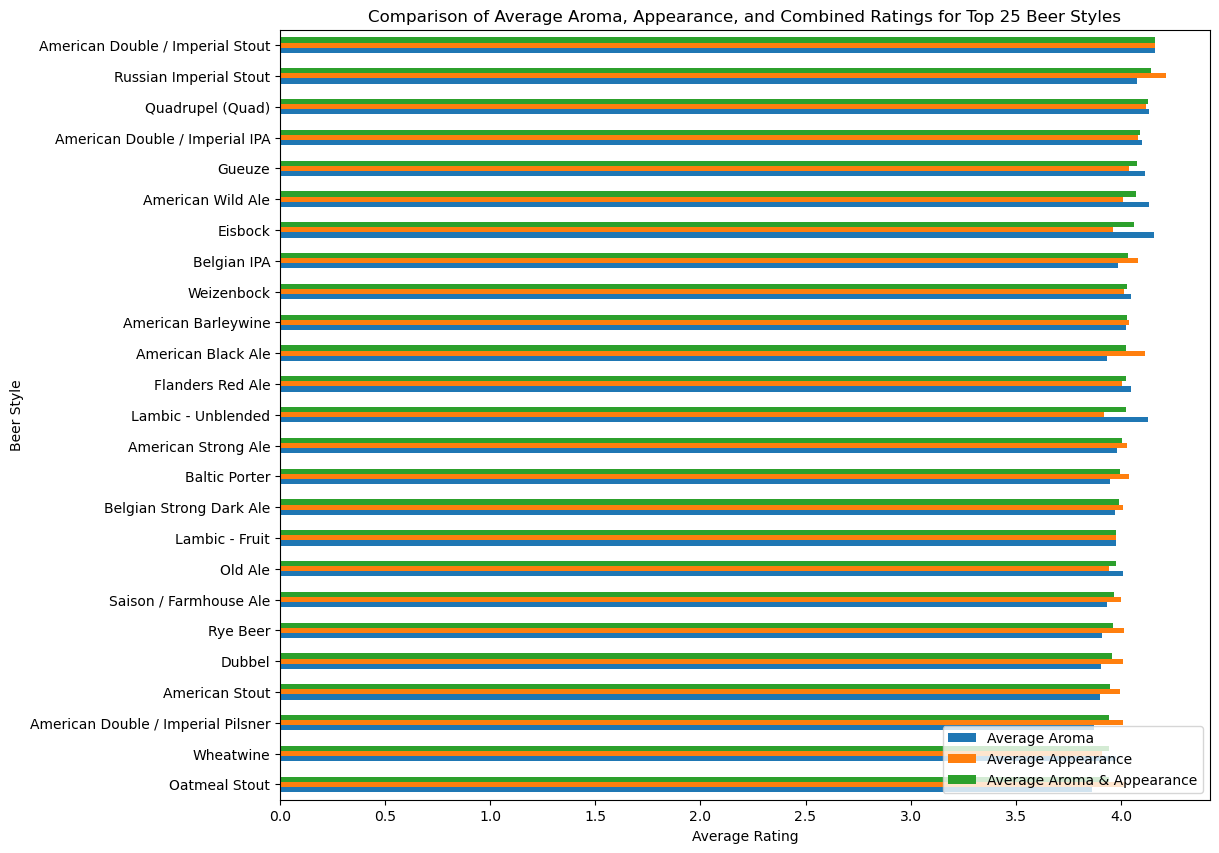

In [642]:
plt.figure(figsize=(12, 10))
top_25_styles_sorted[['avg_aroma', 'avg_appearance', 'avg_aroma_appear']].plot(kind='barh', ax=plt.gca())

plt.xlabel('Average Rating')
plt.ylabel('Beer Style')
plt.title('Comparison of Average Aroma, Appearance, and Combined Ratings for Top 25 Beer Styles')
plt.legend(["Average Aroma", "Average Appearance", "Average Aroma & Appearance"], loc='lower right')
plt.show()


### In order to find the beer which aroma and appearance matches the beer style, I have reviewed both aroma and appearance reviews and take the avg. of them.

### And American Double / Imperial Stout has the highest avg. value.(The green bar)

